<a href="https://colab.research.google.com/github/buffolu/pytorch-tutorial-youtube-codemy.com-/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
# website for playing with cnn
# https://setosa.io/ev/image-kernels/

In [147]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [148]:
# Convert MNIST image files into a Tensor of 4-Dimensions(# of images,heights,width,color channel)
transform = transforms.ToTensor()

In [149]:
#Train data
train_data = datasets.MNIST(root='/cnn_data',train=True,download=True,transform=transform)

In [150]:
#Test data
test_data = datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform)

In [151]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [152]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [153]:
# Create small batch size for images 10
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)


In [154]:
train_loader

In [155]:
#Define Our CNN Model
#Describe convolutional layer and whats its doing (2 conv layers)
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [156]:
# Grab 1 MINST image
for i, (X_train, y_train) in enumerate(train_data):
    break

In [157]:
X_train.shape

torch.Size([1, 28, 28])

In [158]:
x = X_train.view(1,1,28,28)

In [159]:
#perform first Convolution
x = F.relu(conv1(X)) #relu for activation


In [160]:
x

tensor([[[[0.2542, 0.2542, 0.2542,  ..., 0.2542, 0.2542, 0.2542],
          [0.2542, 0.2542, 0.2542,  ..., 0.2542, 0.2542, 0.2542],
          [0.2542, 0.2542, 0.2542,  ..., 0.2542, 0.2542, 0.2542],
          ...,
          [0.2542, 0.2542, 0.2569,  ..., 0.2542, 0.2542, 0.2542],
          [0.2542, 0.2542, 0.2639,  ..., 0.2542, 0.2542, 0.2542],
          [0.2542, 0.2542, 0.2542,  ..., 0.2542, 0.2542, 0.2542]],

         [[0.2308, 0.2308, 0.2308,  ..., 0.2308, 0.2308, 0.2308],
          [0.2308, 0.2308, 0.2308,  ..., 0.2308, 0.2308, 0.2308],
          [0.2308, 0.2308, 0.2308,  ..., 0.2308, 0.2308, 0.2308],
          ...,
          [0.2308, 0.2308, 0.3039,  ..., 0.2308, 0.2308, 0.2308],
          [0.2308, 0.2308, 0.3272,  ..., 0.2308, 0.2308, 0.2308],
          [0.2308, 0.2308, 0.2308,  ..., 0.2308, 0.2308, 0.2308]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [161]:
#1 image, 6 filters, 26x26 image(lost due to no padding)
x.shape

torch.Size([1, 6, 26, 26])

In [162]:
# pass through the pooling layer
x = F.max_pool2d(x,2,2) # kernal of 2 and stride of 2


In [163]:
x.shape # 26/2 = 13

torch.Size([1, 6, 13, 13])

In [164]:
# Do our second convolution layer
x = F.relu(conv2(x))
#didnt set padding so losing 2 pixels ( (size-conv.size)/stride + 1 )

In [165]:
x.shape

torch.Size([1, 16, 11, 11])

In [166]:
x = F.max_pool2d(x,2,2) #11/2 = 5.5 but need to round down

In [167]:
x.shape

torch.Size([1, 16, 5, 5])

In [168]:
((28-2) / 2- 2 ) / 2

5.5

In [169]:
#Build a Model
#Model class
class ConvolutionNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    #fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)


    #SECOND PASS
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) #2X2 KERNAL AND STRIDE 2

    #re-view data
    X = X.view(-1,5*5*16) #make X a vector
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)


In [170]:
torch.manual_seed(41)
model = ConvolutionNetwork()
model


ConvolutionNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [171]:
#Loss Function Optimizer
criteron = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [176]:
import time
start_time = time.time()

#Create variable to track things
ephocs = 5
train_loses = []
test_loses = []
train_correct = []
test_correct = []

#for loop of Ephochs
for i in range(ephocs):
  trn_corr = 0
  ts_corr = 0


  #train
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1 # start batch at 1
    y_pred = model(X_train) #create y prediction from training set
    loss = criteron(y_pred,y_train) #how off are are we?

    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()

    trn_corr += batch_corr

    #update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600 == 0:

      print(f'epoch:{i} batch:{b} loss:{loss.item()}')
  train_loses.append(loss)
  train_correct.append(trn_corr)



  #test
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
      ts_corr += (predicted == y_test).sum()
  loss = criteron(y_val,y_test)
  test_loses.append(loss)
  test_correct.append(ts_corr)
  #results
  loss = criteron(y_val,y_test)
  test_loses.append(loss)
  test_correct.append(ts_corr)


current_time = time.time()
total = current_time - start_time
print(f'training took:{total/60} minues')

epoch:0 batch:600 loss:0.0035083782859146595
epoch:0 batch:1200 loss:0.0020227667409926653
epoch:0 batch:1800 loss:0.00014359336637426168
epoch:0 batch:2400 loss:0.006023935042321682
epoch:0 batch:3000 loss:0.00019805254123639315
epoch:0 batch:3600 loss:0.0003215094329789281
epoch:0 batch:4200 loss:0.00013303720334079117
epoch:0 batch:4800 loss:0.00013116961054038256
epoch:0 batch:5400 loss:0.007491172291338444
epoch:0 batch:6000 loss:0.00026404534582979977
epoch:1 batch:600 loss:0.0003380640409886837
epoch:1 batch:1200 loss:0.14714379608631134
epoch:1 batch:1800 loss:4.033394361613318e-05
epoch:1 batch:2400 loss:2.9381999411270954e-05
epoch:1 batch:3000 loss:6.436575495172292e-05
epoch:1 batch:3600 loss:0.00028954408480785787
epoch:1 batch:4200 loss:0.0031209480948746204
epoch:1 batch:4800 loss:0.0001400594337610528
epoch:1 batch:5400 loss:0.44415774941444397
epoch:1 batch:6000 loss:0.9346203804016113
epoch:2 batch:600 loss:0.00047568907029926777
epoch:2 batch:1200 loss:0.000172095460

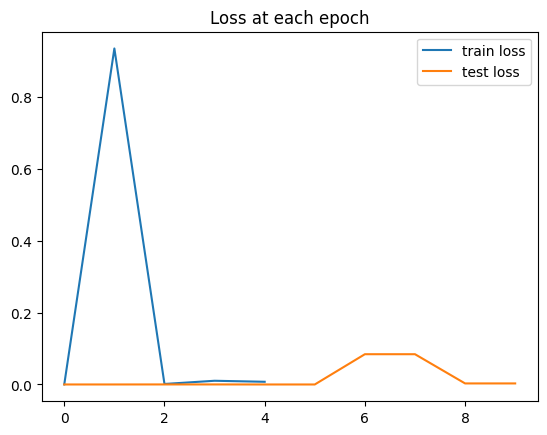

In [177]:
#Graph loss at each epoch
train_loses = [tl.item() for tl in train_loses]
plt.plot(train_loses,label='train loss')
plt.plot(test_loses,label='test loss')
plt.title('Loss at each epoch')
plt.legend()

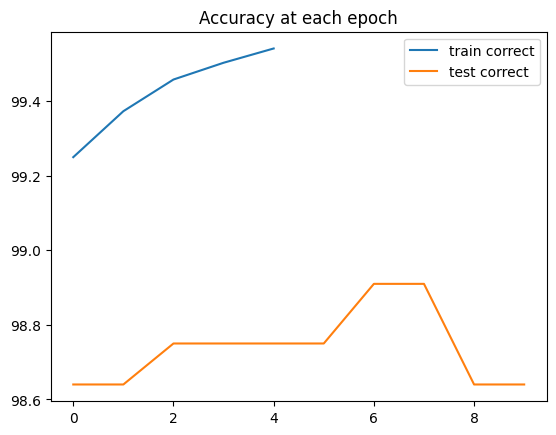

In [179]:
plt.plot([t/600 for t in train_correct],label='train correct')
plt.plot([t/100 for t in test_correct],label='test correct')
plt.title('Accuracy at each epoch')
plt.legend()

In [181]:
test_load_everything = DataLoader(test_data,batch_size=10000,shuffle=False)


In [182]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val.data,1)[1]
    correct += (predicted == y_test).sum()

In [183]:
correct.item()

9864

In [185]:
#Grab an image
test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [186]:
#grab just the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [187]:
#reshape
test_data[4143][0].view(1,1,28,28)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

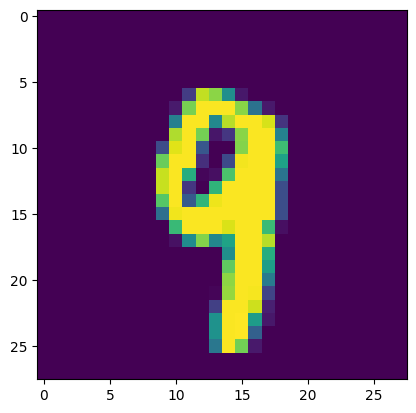

In [188]:
#show image
plt.imshow(test_data[4143][0].view(28,28))

In [189]:
#lets passs the image through the model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28))

In [190]:
new_prediction

tensor([[-29.2831, -27.1541, -36.6961, -26.6995, -16.9896, -27.1886, -38.2177,
         -22.9460, -23.3469,   0.0000]])

In [191]:
new_prediction.argmax()

tensor(9)